In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
#from modularity_maximization.utils import get_modularity

In [ ]:
#read data
terrorism = pd.read_csv(r'/content/drive/MyDrive/data/Noordin-Top-Terrorist-Network-Data.csv')
terrorism.isnull().sum()

NAME       0
ORGAN1     0
ORGAN2     0
ORGAN3     0
ORGAN4     0
          ..
NATION     0
STATUS     0
ROLE       0
GROUP      0
NOORDIN    0
Length: 568, dtype: int64

In [ ]:
#delete colomun name 
terrorism.drop('NAME', axis = 1, inplace = True)

In [ ]:
#supprimer les derniers lignes pour obtenir 59 noeuds
i=78
while(i>58):
  terrorism=terrorism.drop([i], axis = 0)
  i-=1

In [ ]:
scaler = StandardScaler()
terrorism_scaled = scaler.fit_transform(terrorism)

In [ ]:
#model autoencoder
input_df = Input( shape = (567, ))
x = Dense(250, activation = 'relu')(input_df)
x=Dense(100, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(1000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(200, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(15, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(200, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(250, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x=Dense(100, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(567, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
#autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
#training data
autoencoder.fit(terrorism_scaled, terrorism_scaled, batch_size= 120, epochs = 24, verbose = 1)

Epoch 1/24
1/1 [==============================] - 0s 438ms/step - loss: 0.6038 - accuracy: 0.0000e+00
Epoch 2/24
1/1 [==============================] - 0s 10ms/step - loss: 0.5912 - accuracy: 0.0000e+00
Epoch 3/24
1/1 [==============================] - 0s 10ms/step - loss: 0.5854 - accuracy: 0.0000e+00
Epoch 4/24
1/1 [==============================] - 0s 9ms/step - loss: 0.5814 - accuracy: 0.0169
Epoch 5/24
1/1 [==============================] - 0s 7ms/step - loss: 0.5776 - accuracy: 0.0169
Epoch 6/24
1/1 [==============================] - 0s 8ms/step - loss: 0.5732 - accuracy: 0.0339
Epoch 7/24
1/1 [==============================] - 0s 7ms/step - loss: 0.5680 - accuracy: 0.0678
Epoch 8/24
1/1 [==============================] - 0s 8ms/step - loss: 0.5618 - accuracy: 0.1017
Epoch 9/24
1/1 [==============================] - 0s 10ms/step - loss: 0.5547 - accuracy: 0.1017
Epoch 10/24
1/1 [==============================] - 0s 15ms/step - loss: 0.5468 - accuracy: 0.1525
Epoch 11/24
1/1 [====

In [ ]:
pred = encoder.predict(terrorism_scaled)

In [ ]:
#elbow method
score_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)
    

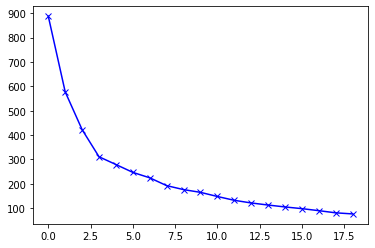

In [ ]:
plt.plot(score_2, 'bx-')

In [ ]:
#use spectral algorithm
import sklearn
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
silhouette_avg = silhouette_score(pred, labels)
Davies_community= sklearn.metrics.davies_bouldin_score(pred, labels)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred, labels)  

print(Calinski_Harabaz)
print(Davies_community)
print(silhouette_avg)

30.860431964259895
0.33106128226927983
0.70740587


In [ ]:
#use this code when you need to save the list of label 
fichier = open("l59features_kmeansAE.txt", "w")
st=""
for i in labels:
  st=str(i)
  fichier.write(st+" ")
fichier.write(st+"\n")    
fichier.close()

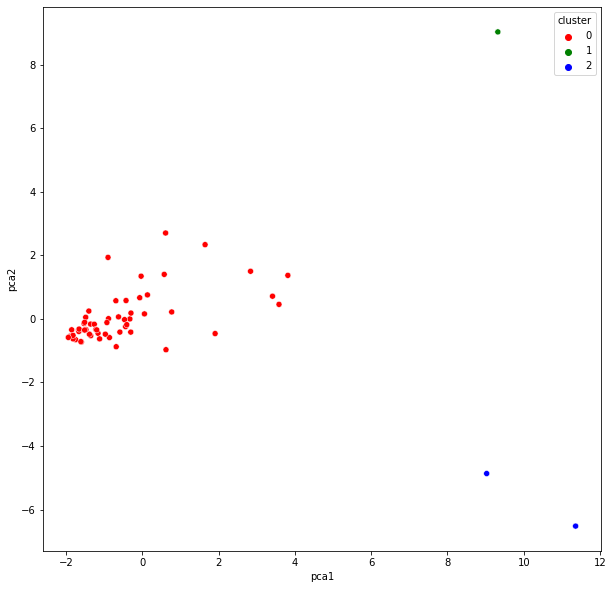

In [ ]:
#show the data 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred)
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue'])